In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Basics Gaussian Processes for Regression & Classification Tasks

GP implementation from scratch

We define our model for the function $f:\mathbb{R}^n \rightarrow \mathbb{R}$ with $f \sim GP(m(\cdot), k(\cdot, \cdot))$.

As GPs let us incooperate prior assumbtions into our model,
we have to chose a `mean function` and a `covariance functioon`.

- `mean-function`: Set a mean value for areas without any additional information.
- `cov-function`:  Defines underlying relationship/correlation between observations in relation to their distance.

*For simplicity we set our mean function to:* $mean(x)=0$

### Covariance function: RBF (Radial Basis Function)


$$
k(xi
, xj ) = η * exp(−
\frac{1}{l^2} ||xi − xj ||^2
)
$$



GPs are called non-parametric models.\
Actually we have free parameters based on the covariance function we choose.\
`RBF` has two: $l, η$ \
\
$l$ (`lengthscale`) - Sets strength of correlation between points based on their distance.\
$η$ (`variance`) - Uncertainty in regions without information.

In [2]:
def rbf(Xa, Xb, l=1.0, sigma_f=1.0):
    
    rbf = sigma_f**2 * np.exp(-0.5/(l**2) * ((Xa[:, np.newaxis] - Xb.T)**2))
    rbf = rbf.reshape(Xa.size, Xb.size)
    return rbf


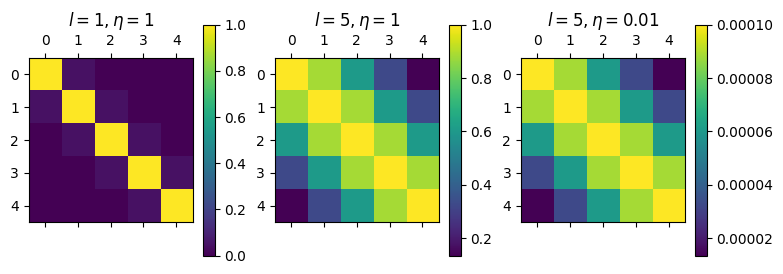

In [56]:
x = np.linspace(-5, 5, 5) # Evenly spaced x values

fig, ax = plt.subplots(ncols=3, figsize=(9,3))
cx = ax[0].matshow(rbf(x,x,sigma_f=(sig:=1), l=(l:=1)))
fig.colorbar(cx)
ax[0].set_title(f"$l={l}, η={sig}$")
cx = ax[1].matshow(rbf(x,x,sigma_f=(sig:=1), l=(l:=5)))
fig.colorbar(cx)
ax[1].set_title(f"$l={l}, η={sig}$")
cx = ax[2].matshow(rbf(x,x,sigma_f=(sig:=0.01), l=(l:=5)))

# Adjust colorbar height to colormap.

fig.colorbar(cx)
ax[2].set_title(f"$l={l}, η={sig}$")

# fig.tight_layout()
plt.show()
plt.close()

## GP Prior

We are already able to sample from our GP-Prior.\
Lets visualize what it represents.

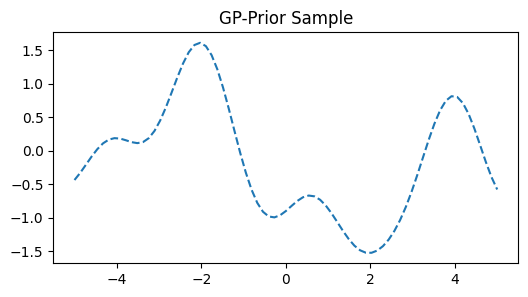

In [10]:
n_samples = 75  # Number of points in each function
n_draws = 1  # Number of functions to sample

x = np.linspace(-5, 5, n_samples) # Evenly spaced x values

cov_matrix = rbf(x,x,sigma_f=1, l=1)

# Calc y value
y = np.random.multivariate_normal(
    mean=np.zeros(n_samples),
    cov=cov_matrix, 
    size=n_draws
)

plt.figure(figsize=(6, 3))
for i in range(n_draws):
    plt.plot(x, y[i], linestyle='--',markersize=5)

plt.title(f"GP-Prior Sample")
plt.show()
plt.close()

**Lets break down what we did:**

1. Create evenly spaced input vector x = [-5, 5].
2. Calculate the covariance matrix for x.
3. Draw random samples from the multivariate normal distribution defined by
   - mean
   - covariance
4. Plot y against corresponding x values.